# Verovatnoća

## Bacanje novčića

Jedan od eksperimenata gde je veoma lako računanje verovatnoća (u striktnom matematičkom smislu - određivanje prostora verovatnoća definisanog aksiomama). Pretpostavimo da bacamo fer novčić, i neka je $G$ verovatnoća događaja da ispadne glava, a $P$ verovatnoća događaja da padne pismo. Određivanje $P(G)$ je jednostavno. Znamo da je

$$P(G)=P(P)$$ za fer novčić.

Takođe, prema aksiomama verovatnoće važi: 

$$P(G)+P(P)=1$$ 

iz čega sledi

$$P(G)=\frac{1}{2}=0.5$$. 

Sada ćemo napraviti $k$ simulacija bacanja novčića $N$ puta i odredićemo statističku verovatnoću (prema statističkoj definiciji) da se dobije pismo, odnosno glava.

U kodu sa '1' označavamo glavu a sa '0' pismo.

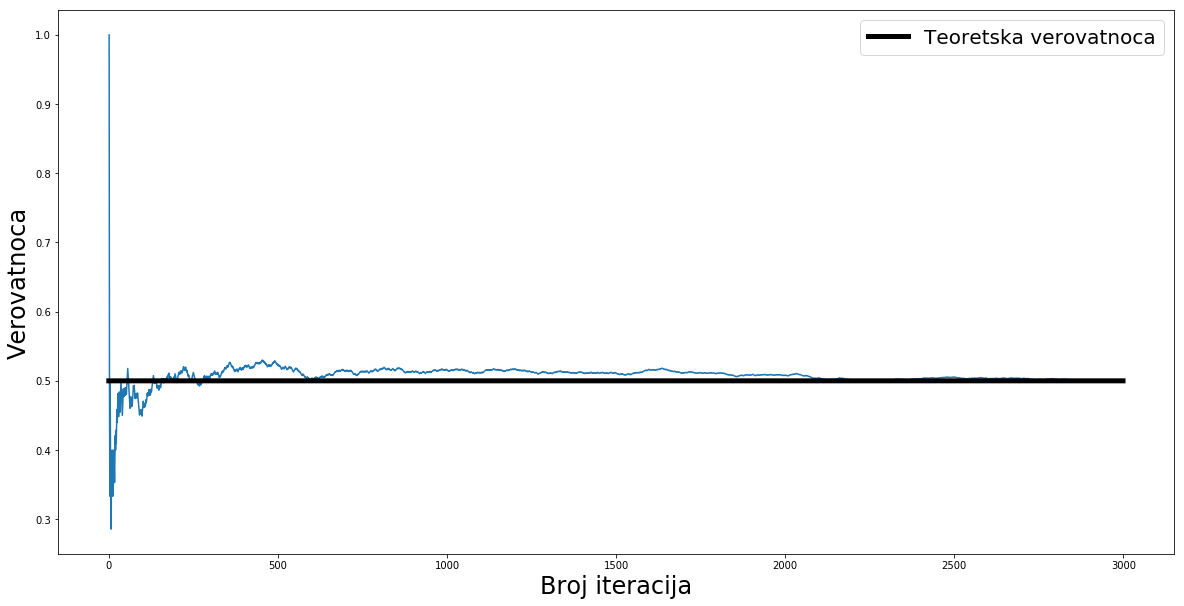

In [1]:
import matplotlib.pyplot as plt
import numpy as np

N=3000

bacanja = np.random.randint(2, size=N)
P_glava = []
br_glava=0
for i in range(1, N+1):
    if bacanja[i-1] == 1:
            br_glava+=1
    P_glava.append(br_glava / i)

    
plt.plot(np.arange(1, N+1), P_glava[0:N])

plt.xlabel('Broj iteracija', fontsize=24)
plt.ylabel('Verovatnoca', fontsize=24)

plt.gcf().set_size_inches(20, 10)  # get current figure
    
plt.plot(range(0, N), [1/2] * N, 'k', linewidth=5.0, label = 'Teoretska verovatnoca')  # 'k' - crna boja
plt.legend(fontsize=20)
plt.show()

## Bacanje kockice

Sada ćemo sagledati dva jednostavna događaja pri bacanju fer kockice. Neka je $A$ događaj da smo dobili $2$. Neka je $B$ događaj da smo dobili paran broj. Izračunaćemo verovatnoće teorijski, pa ćemo verifikovati pomoću simulacija.

**Događaj A:** Postoje šest jednakoverovatnih događaja, od kojih mi biramo jedan, dakle, $$P(A) = \frac{1}{6} = 0.1667$$

Sada simuliramo N bacanja kockice i crtamo ishode na prvom grafiku. Na drugom crtamo statistički izračunatu verovatnoću događaja $A$ kao i teorijski izračunatu.

Crne tačke su ishodi, crveni krst označava događaj $A$. Demonstrirano je i korišćenje widget-a sa kliznim podešavanjem određennog parametra (broja iteracija $N$).

In [2]:
import math
import ipywidgets as widgets

N_max=15000

ishodi = np.random.randint(1,7, size = N_max)
P_A = []
br_A=0
for i in range(1, N_max+1):
    if ishodi[i-1] == 2:
        br_A+=1
    P_A.append(br_A / i)

def graficki_prikaz(n):
    
    plt.plot(range(0, n), [1/6] * n, 'b', linewidth=5.0, label='Teorijska verovatnoca')
        
    plt.plot(np.arange(1, n+1), P_A[0:n], 'k-', linewidth=3.0, label='Statisticka (empirijska) verovatnoca')
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize=20)
    plt.xlabel('Broj iteracija', fontsize = 20)
    plt.ylabel('Verovatnoca', fontsize = 20)
    
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    axes.set_xlim([1, n])
    axes.set_ylim([min(P_A), 1])
    plt.legend(fontsize = 20)
    plt.show()


widgets.interact(
    graficki_prikaz,
    n=widgets.IntSlider(min=10, max=N_max, value = 100, continuous_update=False)) 
# continuous_update=False - funkcija se startuje tek kada se pusti dugme misa

A Jupyter Widget

<function __main__.graficki_prikaz>

**Dogadjaj B:** Od $6$ mogucih ishoda, 3 su parni brojevi, dakle

$$P(B)=3/6=\frac{1}{2}=0.5$$


In [3]:
import ipywidgets as widgets

N_max=15000

ishodi = 1 + np.random.randint(6, size = N_max)
P_B = []

for i in range(1, N_max+1):
    ishodi_do_i = ishodi[0:i]
    index_B2 = [j for j in range(0, i) if ishodi_do_i[j] == 2]
    index_B4 = [j for j in range(0, i) if ishodi_do_i[j] == 4]
    index_B6 = [j for j in range(0, i) if ishodi_do_i[j] == 6]
    P_B.append((len(index_B2) + len(index_B4) + len(index_B6)) / i)

def graficki_prikaz(n):
    
    ishodi_n = ishodi[0:n]
    
    index_B2_n = [z for z in index_B2 if z < n]
    index_B4_n = [z for z in index_B4 if z < n]
    index_B6_n = [z for z in index_B6 if z < n]
    

    y = [2] * len(index_B2_n)
    x = np.array(index_B2_n) + 1 
    
    plt.scatter(x, y, marker=u'x', c='r', s=300) # crtamo crvene x kada se desio dogadjaj B2
    
    y = [4] * len(index_B4_n)
    x = np.array(index_B4_n) + 1
    
    plt.scatter(x, y, marker=u'x', c='r', s=300) # crtamo crvene x kada se desio dogadjaj B4
    
    y = [6] * len(index_B6_n)
    x = np.array(index_B6_n) + 1
    
    plt.scatter(x, y, marker=u'x', c='r', s=300) # crtamo crvene x kada se desio dogadjaj B6
    
    
    plt.plot(range(1, n + 1), ishodi_n, 'k.', markersize = 10.0)  # crtanje ostalih dogadjaja (crne tacke)

    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    plt.xlabel('Broj iteracije', fontsize = 20)
    plt.ylabel('Ishodi', fontsize = 20)
    axes.set_xlim([0.5, n+0.5])
    axes.set_ylim([0, 7])
    plt.show()
    
    plt.plot(range(0, n), [1/2] * n, 'b', linewidth=5.0, label='Teorijska verovatnoca')
        
    plt.plot(np.arange(1, n+1), P_B[0:n], 'k-', linewidth=3.0, label='Statisticka (empirijska) verovatnoca')
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize=20)
    plt.xlabel('Broj iteracija', fontsize = 20)
    plt.ylabel('Verovatnoca', fontsize = 20)
    
    axes = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    axes.set_xlim([1, n])
    axes.set_ylim([min(P_B), 1])
    plt.legend(fontsize = 20)
    plt.show()


widgets.interact(
    graficki_prikaz,
    n=widgets.IntSlider(min=10, max=N_max, value = 300, continuous_update=False))

A Jupyter Widget

<function __main__.graficki_prikaz>

## Događaji u kartanju

Standardni špil karata ima $52$ karte, sa 4 moguća znaka, $13$ tipova (10 brojeva i 3 "slike"), 2 boje (crna, crvena). 'J', 'Q' i 'K' su takozvane 'slike'.

Biramo kartu slučajno, sa $C$ označavamo događaj da je karta crvena, a sa $S$ da je karta slika.
Za sledeće događaje ćemo odrediti verovatnoće teorijski kao i empirijski: $C$, $S$, kao i $C\cup S$. 

**Događaj $C$**: $26$ karata je crveno, dakle $$P(R) = 26/52 = \frac{1}{2} = 0.5.$$


In [4]:
# Importujemo biblioteku korisnu za kombinatoriku
from itertools import product, combinations

In [5]:
# Definicija karata
Tip = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K'}
Znak = {'K', 'P', 'T', 'H'}
Karte = list(product(Tip, Znak))  #Dekartov proizvod
Karte

[(1, 'K'),
 (1, 'H'),
 (1, 'T'),
 (1, 'P'),
 (2, 'K'),
 (2, 'H'),
 (2, 'T'),
 (2, 'P'),
 (3, 'K'),
 (3, 'H'),
 (3, 'T'),
 (3, 'P'),
 (4, 'K'),
 (4, 'H'),
 (4, 'T'),
 (4, 'P'),
 (5, 'K'),
 (5, 'H'),
 (5, 'T'),
 (5, 'P'),
 (6, 'K'),
 (6, 'H'),
 (6, 'T'),
 (6, 'P'),
 (7, 'K'),
 (7, 'H'),
 (7, 'T'),
 (7, 'P'),
 (8, 'K'),
 (8, 'H'),
 (8, 'T'),
 (8, 'P'),
 (9, 'K'),
 (9, 'H'),
 (9, 'T'),
 (9, 'P'),
 (10, 'K'),
 (10, 'H'),
 (10, 'T'),
 (10, 'P'),
 ('K', 'K'),
 ('K', 'H'),
 ('K', 'T'),
 ('K', 'P'),
 ('Q', 'K'),
 ('Q', 'H'),
 ('Q', 'T'),
 ('Q', 'P'),
 ('J', 'K'),
 ('J', 'H'),
 ('J', 'T'),
 ('J', 'P')]


 Dobijene empirijske verovatnoce P(C) su [0.4946, 0.4995, 0.5012, 0.4986]


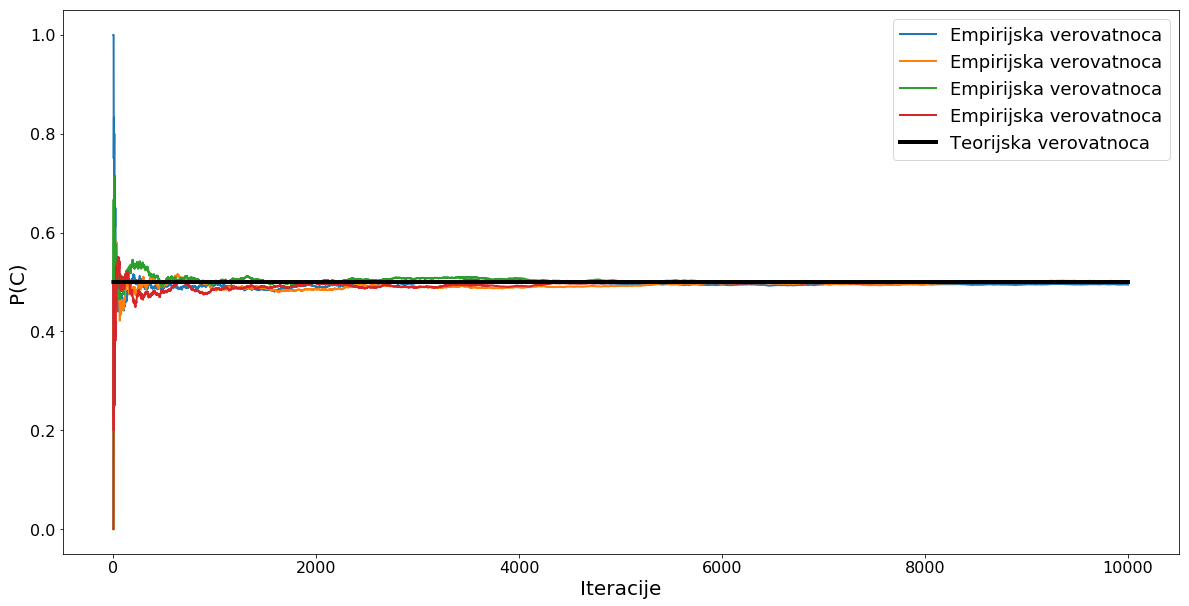

In [6]:
P_C_final = []
br_sim=5
N=10000
for sim in range(1, br_sim):
    P_C = []
    br_crvenih=0
    for i in range(1, N+1):
        index = np.random.randint(0, 52)
        if Karte[index][1] == 'K' or Karte[index][1] == 'H':
            br_crvenih = br_crvenih + 1
        P_C.append(br_crvenih/i)
        
    P_C_final.append(br_crvenih/N)
    
    plt.plot(range(1, N+1), P_C[0:N], linewidth = 2.0, label = 'Empirijska verovatnoca')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iteracije', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('P(C)', fontsize = 20)
    plt.yticks(fontsize = 16)
    
print("\n Dobijene empirijske verovatnoce P(C) su %s" %str(P_C_final))      
plt.plot(range(1, N+1), [0.5]*N, 'k', linewidth = 4.0, label = 'Teorijska verovatnoca')
plt.legend(fontsize = 18)
plt.show()

**Slika ($S$)**:Postoji $4\times3=12$ slika, dakle,
$$P(F) = 12/52 = \frac{3}{13} = 0.231.$$

In [7]:
P_S_final = []
for sim in range(1, k):
    br_slika = 0
    P_S = []
    for i in range(1, N+1):
        index = np.random.randint(0, 52)
        if Karte[index][0] in {'J', 'K', 'Q'}:
            br_slika = br_slika + 1
        P_S.append(br_slika/i)
        
    P_S_final.append(br_slika/N)
    
    plt.plot(range(1, 10001), P_S[0:10000], linewidth = 2.0, label = 'Empirijska verovatnoca')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Broj iteracija', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('P(S)', fontsize = 20)
    plt.yticks(fontsize = 16)
    
print("\n Dobijene empirijske verovatnoce P(S) su %s" %str(P_S_final)) 
plt.plot(range(1, N+1), [3/13]*N, 'k', linewidth = 4.0, label = 'Teorijska verovatnoca')
plt.legend(fontsize = 18)
plt.show()

NameError: name 'k' is not defined

**Crvena ili slika ($C\cup S$):** Izračunaćemo verovatnoću za $C\cap S$. Svaki crveni znak ima 3 slike, dakle $|C\cap S|=6$. 
$$P(C\cap S) = \frac{6}{52} = \frac{3}{26} = 0.115.$$
Koristeći pravilo za verovatnoću unije događaja,
$$P(C\cup S) = P(C) + P(S) - P(C\cap S)
= 0.5 + 0. 231 - 0.115 = 0.615.$$

In [ ]:
P_presek_final = []
for sim in range(1, k):
    br_preseka = 0
    P_presek = []
    for i in range(1, N+1):
        index = np.random.randint(0, 52)
        if (Karte[index][0] in {'J', 'K', 'Q'}) and (Karte[index][1] == 'K' or Karte[index][1] == 'H'):
            br_preseka = br_preseka + 1
            
        P_presek.append(br_preseka/i)
        
    P_presek_final.append(br_preseka/N)
    plt.plot(range(1, N+1), P_presek[0:N], linewidth = 2.0, label = 'Empirijska verovatnoca')
    
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Broj iteracije', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('$P(C\cap S)$', fontsize = 20)
    plt.yticks(fontsize = 16)
    

print("\n Dobijene empirijske verovatnoce preseka su %s" %str(P_presek_final)) 
plt.plot(range(1, N+1), [3/26]*N, 'k', linewidth = 4.0, label = 'Teorijska verovatnoca')
plt.legend(fontsize = 18)
plt.show()

In [ ]:
P_unija_final = []
for sim in range(1, k):
    br_unije = 0
    P_unija = []
    for i in range(1, N+1):
        index = np.random.randint(0, 52)
        if (Karte[index][0] in {'J', 'K', 'Q'}) or (Karte[index][1] == 'K' or Karte[index][1] == 'H'):
            br_unije = br_unije + 1
        P_unija.append(br_unije/i)
    P_unija_final.append(br_unije/N)
    
    plt.plot(range(1, N+1), P_unija[0:N], linewidth = 2.0, label = 'Empirijka verovatnoca')
    plt.gcf().set_size_inches([20, 10])
    plt.xlabel('Iterations', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.ylabel('$P(C\cap S)$', fontsize = 20)
    plt.yticks(fontsize = 16)
    

print("\n Dobijene empirijske verovatnoce unije su %s" %str(P_unija_final)) 
plt.plot(range(1, N+1), [1/2 + 3/13 - 3/26]*N, 'k', linewidth = 4.0, label = 'Teorijska verovatnoca')
plt.legend(fontsize = 18)
plt.show()

# Permutacije i kombinacije

## Permutacije

Pronaći ćemo broj $k$-permutacija (varijacija bez ponavljanja) skupa $A$, prvo pronalaženjem celog skupa svih permutacija, a onda direktnim izračunavanjem $\frac{|A|!}{(|A|-k)!}$. 

Prvo tretiramo specijalni slučaj $k=|A|$ - permutacije bez ponavljanja (broj načina na koje možemo da poređamo elemente).

In [ ]:
import itertools   # biblioteka sa funkcijama iz kombinartorike
A = {1, 2, 3}
permute_all = set(itertools.permutations(A))  # permutations() daje sve permutacije skupa
print("Permutacije skupa %s:  " %A)
for i in permute_all:
    print(i)
print;print("Broj permutacija: ", len(permute_all))

In [ ]:
# Direktnim izračunavanjem |A|! , dobija se
from math import factorial
print(factorial(len(A)))

In [ ]:
A = {1, 2, 3, 4}
k = 3

In [ ]:
# k-permutacije skupa A (ili varijacije bez ponavljanja)
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutacije (varijacije bez ponavljanja) skupa %s:  " %(k,A))
for i in permute_k:
    print(i)
print;print("Broj permutacija = ", len(permute_k))

In [ ]:
# Direktnim izračunavanjem |A|!/(|A|-k)! 
print(int(factorial(len(A))/factorial(len(A)-k)))

In [ ]:
A = {'a', 'b', 'c', 'q'}
k = 3
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutacije skupa %s:" %(k,A))
for i in permute_k:
    print(i)
print;print("Broj permutacija:", len(permute_k))

In [ ]:
# Direktnim izracunvanjem |A|!/(|A|-k)! 
print(int(factorial(len(A))/factorial(len(A)-k)))

## 4.2 Kombinacije
Pronaći ćemo broj $k$-kombinacija skupa $A$, prvo pronalaženjem skupa svih kombinacija, zatim računanjem ${|A|}\choose{k}$.

In [ ]:
A = {1, 2, 3, 4}
k = 2
# Stampa svih k-kombinacija skupa A
kombinacije_k = list(itertools.combinations(A,k))
print("%i-kombinacije skupa %s:  " %(k,A))
for i in kombinacije_k:
    print(i)
print;print("Broj kombinacija = %i" %len(kombinacije_k)  )

In [ ]:
# Računanjem |A|!/(k!(|A|-k)!)   (n nad k) direktno
print(int(factorial(len(A))/(factorial(k)*factorial(len(A)-k))))

In [ ]:
A = {'a', 'b', 'c', 'd'}
k = 2
# Stampa svih k-kombinacija skupa A
kombinacije_k = list(itertools.combinations(A,k))
print("%i-kombinacije skupa %s:\n" %(k,A))
for i in range(0, len(kombinacije_k)):
    print(''.join(kombinacije_k[i]) )
print;print("Broj kombinacija = %i!/(%i!(%i-%i)!) = " %(n,k,n,k), len(kombinacije_k))

## Paradoks rođendana

U grupi od 5 ljudi, kolika je verovatnoća da svi imaju rođendan različitog dana? Na prvi pogled bismo rekli da je vrlo verovatno, što je tačno za petoro ljudi. 

Međutim, u grupi od 25 ljudi, verovatnoća da bar dvoje imaju isti rođendan je veća od $0.5$!

Generalno, za grupu od $n$ ljudi računamo verovatnoću da svi imaju rođendan različitog dana:

\begin{align*}
P &= \frac{\text{Broj } n \text{-permutacija rođendana (ili varijacija bez pon.)}}{\text{Ukupan broj mogućih raspodela rođendana (var. sa ponavljanjem)}}\\
&= \frac{365!/(365-n)!}{365^n}\\
&= \prod_{k=1}^n \frac{365-k+1}{365}
\end{align*}

Ova verovatnoća opada sa $n$. Za $n=23$, vrednost opada ispod $0.5$.

Uradićemo simulaciju i proveriti ovu tvrdnju računanjem empirijske verovatnoće.

Slajderom variramo broj iteracija.

In [ ]:
import itertools
import random

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Range of number of people
Broj_ljudi_array = np.arange(1, 26)

# Days in year
Broj_dana_u_godini = 365


def verov_razl_rodj(broj_ljudi):
    '''
    Vraca verovatnocu da su svi rođendani različiti - 
    pretporavljamo uniformnu raspodelu rođendana (svaki dan je jednako verovatan)

    '''
    return (np.arange(Broj_dana_u_godini, Broj_dana_u_godini - broj_ljudi, -1) / Broj_dana_u_godini).prod()


def uzorak(broj_ljudi):
    '''
    Slucajno bira rođendane i vraca True ako su svi rodjendani razliciti.
    '''
    rodj = np.random.randint(0, Broj_dana_u_godini, size=broj_ljudi)
    razliciti_rodj = np.unique(rodj)
    return len(rodj) == len(razliciti_rodj)


def crtanje(iter):
    '''
    Crta teorijske i empirijske verovantoce razlicitih rodjendana
    '''
    emp_prob = []  # Empirijska verovantoca
    prob = []         # Teorijska verovantoca
    
    # Racunanje tacaka
    #np.random.seed(1)
    for broj_ljudi in Broj_ljudi_array:
        br_uzoraka_sa_razl_rodj = sum(uzorak(broj_ljudi) for i in range(iter))
        
        emp_prob.append(br_uzoraka_sa_razl_rodj / iter)
        prob.append(verov_razl_rodj(broj_ljudi))
    
    # Crtanje rezultata
    
    plt.plot(Broj_ljudi_array, prob, 'k-', linewidth = 3.0, label='Teorijska verovatnoca')
    plt.plot(Broj_ljudi_array, emp_prob, 'bo-', linewidth = 3.0, label='Empirijska verovatnoca')
    plt.gcf().set_size_inches(20, 10)
    plt.axhline(0.5, color='red', linewidth = 4.0, label='0.5 granica')
    plt.xlabel('Broj ljudi', fontsize = 18)
    plt.ylabel('Verovatnoca svih razlicitih rodjendana', fontsize = 18)
    plt.grid()
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 18)
    plt.show()

    
interact(crtanje,
         iter=widgets.IntSlider(min=50, value = 500, max=5050, step=200),
         continuous_update=False);

# Vežbanje:

Napisati program koji određuje empirijsku verovatnoću da je od $n$ bacanja novčića, broj glava bio između datih brojeva $k_1$ i $k_2$.